In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [139]:
segs = 5
hs = np.linspace(0,2,segs)
hs

array([0. , 0.5, 1. , 1.5, 2. ])

In [140]:
I = []
P = []
pn = {}
w = {}
t = 1
for h in hs:
    a = np.random.uniform(0,10)
    b = a + (1 + np.random.normal(0.5,0.8))
    I.append([a,b])
    P.append(np.round(np.mean([a,b]),2))
    pn[(np.mean([a,b]),-0.5)] = 'p'+str(t)
    w[(np.round(np.mean([a,b]),2),-0.5)] = np.random.randint(10)

    t+=1
        
#A, B = np.array(I).min(0)[0], np.array(I).max(0)[1]

In [141]:
w

{(7.16, -0.5): 6,
 (3.37, -0.5): 0,
 (4.19, -0.5): 4,
 (9.41, -0.5): 8,
 (9.52, -0.5): 3}

In [142]:
dots = [(x,-0.5) for x in P]

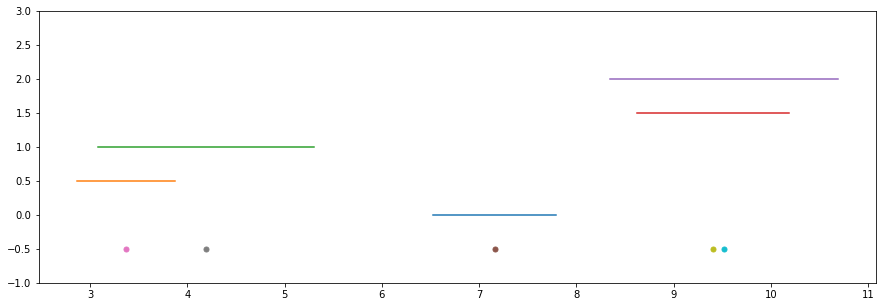

In [202]:
plt.figure(figsize=(15,5))
for h,i in zip(hs,I):
    plt.plot([i[0],i[1]],[h,h])
for i in dots:
    plt.plot([i[0]],[i[1]], marker='o', markersize=5)
plt.ylim(-1,3)
plt.show()

In [244]:
for p in Ps:
    print(p,'--->',w[(p,-0.5)])

3.37 ---> 0
4.19 ---> 4
7.16 ---> 6
9.41 ---> 8
9.52 ---> 3


In [215]:
I = np.array(I)
Is = I[I[:, 0].argsort()] #sort by x coordinate
Ps = np.sort(P)
Is

array([[ 2.86184015,  3.87697319],
       [ 3.08437395,  5.2991011 ],
       [ 6.52513618,  7.79194686],
       [ 8.34852648, 10.68569888],
       [ 8.62479013, 10.1885712 ]])

In [218]:
Ps

array([3.37, 4.19, 7.16, 9.41, 9.52])

In [333]:
selected = []
def algo(intervalIndex, pointIndex):
    print((intervalIndex, pointIndex))
     
    if pointIndex == 5:
        if intervalIndex == 5:
            val = 0
        else:
            val = 1000
            
    elif intervalIndex == 5:
        val = 0
        
    else:
        print(Ps[pointIndex],' ', Is[intervalIndex])
        
        if memo[intervalIndex][pointIndex] != -1:
            print('memo')
            val = memo[intervalIndex][pointIndex]
            #print('1',val)
      
        else:
            val = algo(intervalIndex, pointIndex+1) # No toma punto
            print('val 1:',val)
        
            idx = intervalIndex
            print('Point:',Ps[pointIndex])
            print((intervalIndex, pointIndex))
            for k in np.arange(intervalIndex+1, 5): # Avanza intervalos
                #print(Is[k])
                if Is[k][0] <= Ps[pointIndex] and Ps[pointIndex] <= Is[k][1]:
                    print(k,Is[k])
                    idx = k
                    
            print('Min', (val, w[(Ps[pointIndex],-0.5)] , algo(idx+1,pointIndex+1) ) )
            val = np.min( (val, w[(Ps[pointIndex],-0.5)] + algo(idx+1,pointIndex+1) ) ) # Toma punto
            print('val 2:', val,'\n')
            selected.append((Ps[pointIndex],-0.5))
            
            memo[intervalIndex][pointIndex] = val 
            #print('2',val)
    #print('Selected:',selected)
    return val

In [334]:
memo = np.ones((segs,segs))*-1
algo(0,0)

(0, 0)
3.37   [2.86184015 3.87697319]
(0, 1)
4.19   [2.86184015 3.87697319]
(0, 2)
7.16   [2.86184015 3.87697319]
(0, 3)
9.41   [2.86184015 3.87697319]
(0, 4)
9.52   [2.86184015 3.87697319]
(0, 5)
val 1: 1000
Point: 9.52
(0, 4)
3 [ 8.34852648 10.68569888]
4 [ 8.62479013 10.1885712 ]
(5, 5)
Min (1000, 3, 0)
(5, 5)
val 2: 3 

val 1: 3
Point: 9.41
(0, 3)
3 [ 8.34852648 10.68569888]
4 [ 8.62479013 10.1885712 ]
(5, 4)
Min (3, 8, 0)
(5, 4)
val 2: 3 

val 1: 3
Point: 7.16
(0, 2)
2 [6.52513618 7.79194686]
(3, 3)
9.41   [ 8.34852648 10.68569888]
(3, 4)
9.52   [ 8.34852648 10.68569888]
(3, 5)
val 1: 1000
Point: 9.52
(3, 4)
4 [ 8.62479013 10.1885712 ]
(5, 5)
Min (1000, 3, 0)
(5, 5)
val 2: 3 

val 1: 3
Point: 9.41
(3, 3)
4 [ 8.62479013 10.1885712 ]
(5, 4)
Min (3, 8, 0)
(5, 4)
val 2: 3 

Min (3, 6, 3)
(3, 3)
9.41   [ 8.34852648 10.68569888]
memo
val 2: 3.0 

val 1: 3.0
Point: 4.19
(0, 1)
1 [3.08437395 5.2991011 ]
(2, 2)
7.16   [6.52513618 7.79194686]
(2, 3)
9.41   [6.52513618 7.79194686]
(2, 4)
9.5

3.0

In [332]:
memo

array([[ 3.,  3.,  3.,  3.,  3.],
       [-1., -1., -1., -1., -1.],
       [-1.,  3.,  3.,  3.,  3.],
       [-1., -1.,  3.,  3.,  3.],
       [-1., -1., -1.,  3.,  3.]])